# Ingest

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns; sns.set(color_codes=True)
from sklearn.cluster import KMeans
color = sns.color_palette()
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

In [2]:
df = pd.read_csv("Zip_Zhvi_SingleFamilyResidence.csv")


In [3]:
df.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09
count,15282.000,15282.000,15282.000,10843.000,10974.000,10998.000,11005.000,11018.000,11018.000,11018.000,...,15232.000,15282.000,15282.000,15282.000,15282.000,15282.000,15282.000,15282.000,15282.000,15282.000
mean,80125.483,46295.286,7641.500,123036.189,122971.396,122955.756,122978.601,123053.295,123168.660,123334.779,...,258309.913,259161.098,260118.846,261045.308,261971.018,262927.640,263803.226,264618.329,265565.816,266395.956
std,30816.445,28934.030,4411.678,78308.265,77822.431,77728.750,77712.302,77681.914,77730.936,77814.034,...,286788.579,287657.252,287840.275,287918.491,288476.692,289147.943,289719.317,290338.071,291066.856,291579.369
min,58196.000,1001.000,1.000,24400.000,23900.000,24200.000,24700.000,24700.000,25100.000,25300.000,...,31800.000,32100.000,31900.000,31200.000,30600.000,30600.000,30900.000,31400.000,32600.000,32700.000
25%,66785.250,21087.750,3821.250,75700.000,75900.000,76000.000,76000.000,76200.000,76225.000,76300.000,...,122100.000,122500.000,123100.000,123700.000,124100.000,124700.000,125100.000,125600.000,126025.000,126500.000
50%,77175.000,44306.500,7641.500,104300.000,104450.000,104500.000,104600.000,104900.000,105000.000,105100.000,...,176800.000,177400.000,178300.000,179200.000,179900.000,180600.000,181300.000,182000.000,182500.000,183100.000
75%,88700.500,70399.500,11461.750,147100.000,147200.000,147100.000,147400.000,147475.000,147575.000,147600.000,...,288425.000,289200.000,290300.000,291375.000,292300.000,293400.000,294800.000,296000.000,297400.000,298750.000
max,738092.000,99901.000,15282.000,1769000.000,1768100.000,1766900.000,1764200.000,1762200.000,1762600.000,1763900.000,...,6299300.000,6360300.000,6336400.000,6255500.000,6294300.000,6403700.000,6468900.000,6489100.000,6492000.000,6475600.000


## Clean up

In [4]:
df.rename(columns={"RegionName":"ZipCode"}, inplace=True)
df["ZipCode"]=df["ZipCode"].map(lambda x: "{:.0f}".format(x))
df["RegionID"]=df["RegionID"].map(lambda x: "{:.0f}".format(x))
df.head()

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09
0,84654,60657,Chicago,IL,Chicago,Cook,1.000,420800.000,423500.000,426200.000,...,1097900.000,1098300.000,1094700.000,1088500.000,1081200.000,1073900.000,1064300.000,1054300.000,1048500.000,1044400.000
1,84616,60614,Chicago,IL,Chicago,Cook,2.000,542400.000,546700.000,551700.000,...,1522800.000,1525900.000,1525000.000,1526100.000,1528700.000,1526700.000,1518900.000,1515800.000,1519900.000,1525300.000
2,93144,79936,El Paso,TX,El Paso,El Paso,3.000,70900.000,71200.000,71100.000,...,114200.000,114300.000,114200.000,114000.000,113800.000,114000.000,114000.000,113800.000,113500.000,113300.000
3,84640,60640,Chicago,IL,Chicago,Cook,4.000,298200.000,297400.000,295300.000,...,739400.000,743100.000,741500.000,736300.000,729500.000,727700.000,726000.000,718800.000,713400.000,710900.000
4,61807,10467,New York,NY,New York,Bronx,5.000,nan,nan,nan,...,391600.000,388900.000,388800.000,391100.000,394400.000,396900.000,398600.000,400500.000,402600.000,403700.000


This code block below calculates the median values of various attributes (likely prices over time) for specific geographical locations (Marin County, San Francisco, Palo Alto) and compares them against the overall median from the entire dataset, organizing all these median values into a single, easy-to-read comparison DataFrame.

In [6]:
median_prices = df.median()
marin_df = df[df["CountyName"] == "Marin"].median()
sf_df = df[df["City"] == "San Francisco"].median()
palo_alto = df[df["City"] == "Palo Alto"].median()
df_comparison = pd.concat([marin_df, sf_df, palo_alto, median_prices], axis=1)
df_comparison.columns = ["Marin County", "San Francisco", "Palo Alto", "Median USA"]

## Scale and Cluster

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
columns_to_drop = ['RegionID', 'ZipCode', 'City', 'State', 'Metro', 'CountyName']
df_numerical = df.dropna()
df_numerical = df_numerical.drop(columns_to_drop, axis=1)

In [9]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df_numerical)
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_df)
print(len(kmeans.labels_))

10015


In [10]:
cluster_df = df.copy(deep=True)
cluster_df.dropna(inplace=True)
cluster_df.describe()
cluster_df['cluster'] = kmeans.labels_
cluster_df['appreciation_ratio'] = round(cluster_df["2017-09"]/cluster_df["1996-04"],2)
cluster_df['CityZipCodeAppRatio'] = cluster_df['City'].map(str) + "-" + cluster_df['ZipCode'] + "-" + cluster_df["appreciation_ratio"].map(str)
cluster_df.head()

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,cluster,appreciation_ratio,CityZipCodeAppRatio
0,84654,60657,Chicago,IL,Chicago,Cook,1.000,420800.000,423500.000,426200.000,...,1088500.000,1081200.000,1073900.000,1064300.000,1054300.000,1048500.000,1044400.000,1,2.480,Chicago-60657-2.48
1,84616,60614,Chicago,IL,Chicago,Cook,2.000,542400.000,546700.000,551700.000,...,1526100.000,1528700.000,1526700.000,1518900.000,1515800.000,1519900.000,1525300.000,1,2.810,Chicago-60614-2.81
2,93144,79936,El Paso,TX,El Paso,El Paso,3.000,70900.000,71200.000,71100.000,...,114000.000,113800.000,114000.000,114000.000,113800.000,113500.000,113300.000,2,1.600,El Paso-79936-1.6
3,84640,60640,Chicago,IL,Chicago,Cook,4.000,298200.000,297400.000,295300.000,...,736300.000,729500.000,727700.000,726000.000,718800.000,713400.000,710900.000,0,2.380,Chicago-60640-2.38
5,91733,77084,Houston,TX,Houston,Harris,6.000,76700.000,76500.000,76000.000,...,154700.000,155500.000,158700.000,160600.000,161300.000,161800.000,161500.000,2,2.110,Houston-77084-2.11


## Plot

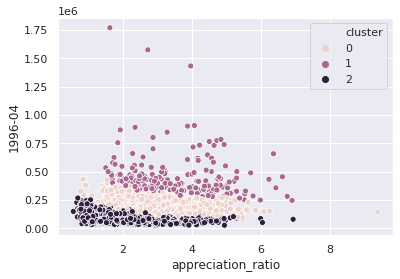

In [11]:
import seaborn as sns
x=cluster_df["appreciation_ratio"]
y=cluster_df["1996-04"]
sns.scatterplot(x="appreciation_ratio", y="1996-04", data=cluster_df, hue="cluster")